# Loading in the libraries.

In [1]:
# Old libraries that we know and love.
import numpy as np
import pandas as pa
import sklearn
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import tensorflow

%matplotlib inline

# Preliminaries

Read in the data

In [2]:
data = pa.read_csv('train.csv')
test = pa.read_csv('test.csv')

The size of our data was 

In [3]:
data.shape

(42000, 785)

One measurement

In [4]:
data.iloc[0,:]
data.iloc[1,:]

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 785, dtype: int64

# Looking at the data

In [5]:
X = np.array(data.iloc[:, 1:])
y = np.array(data.iloc[:, 0])

In [6]:
print(y)
print(X)

[1 0 1 ..., 7 6 9]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [7]:
print(max(X[0]), "is the max and ", min(X[0]), "is the minimum for the first entry")  

255 is the max and  0 is the minimum for the first entry


In [8]:
pixels = X[34].reshape((28,28));

In [9]:
def plotnumber(a):
    pixels = X[a].reshape((28,28));
   # plt.title('Label is {label}'.format(label=y[a]))
    plt.imshow(np.invert(pixels), cmap='gray')
    #return plt.show()


#plt.title('Label is {label}'.format(label=y[a]))
#plt.imshow(pixels, cmap='gray')
#plt.show()

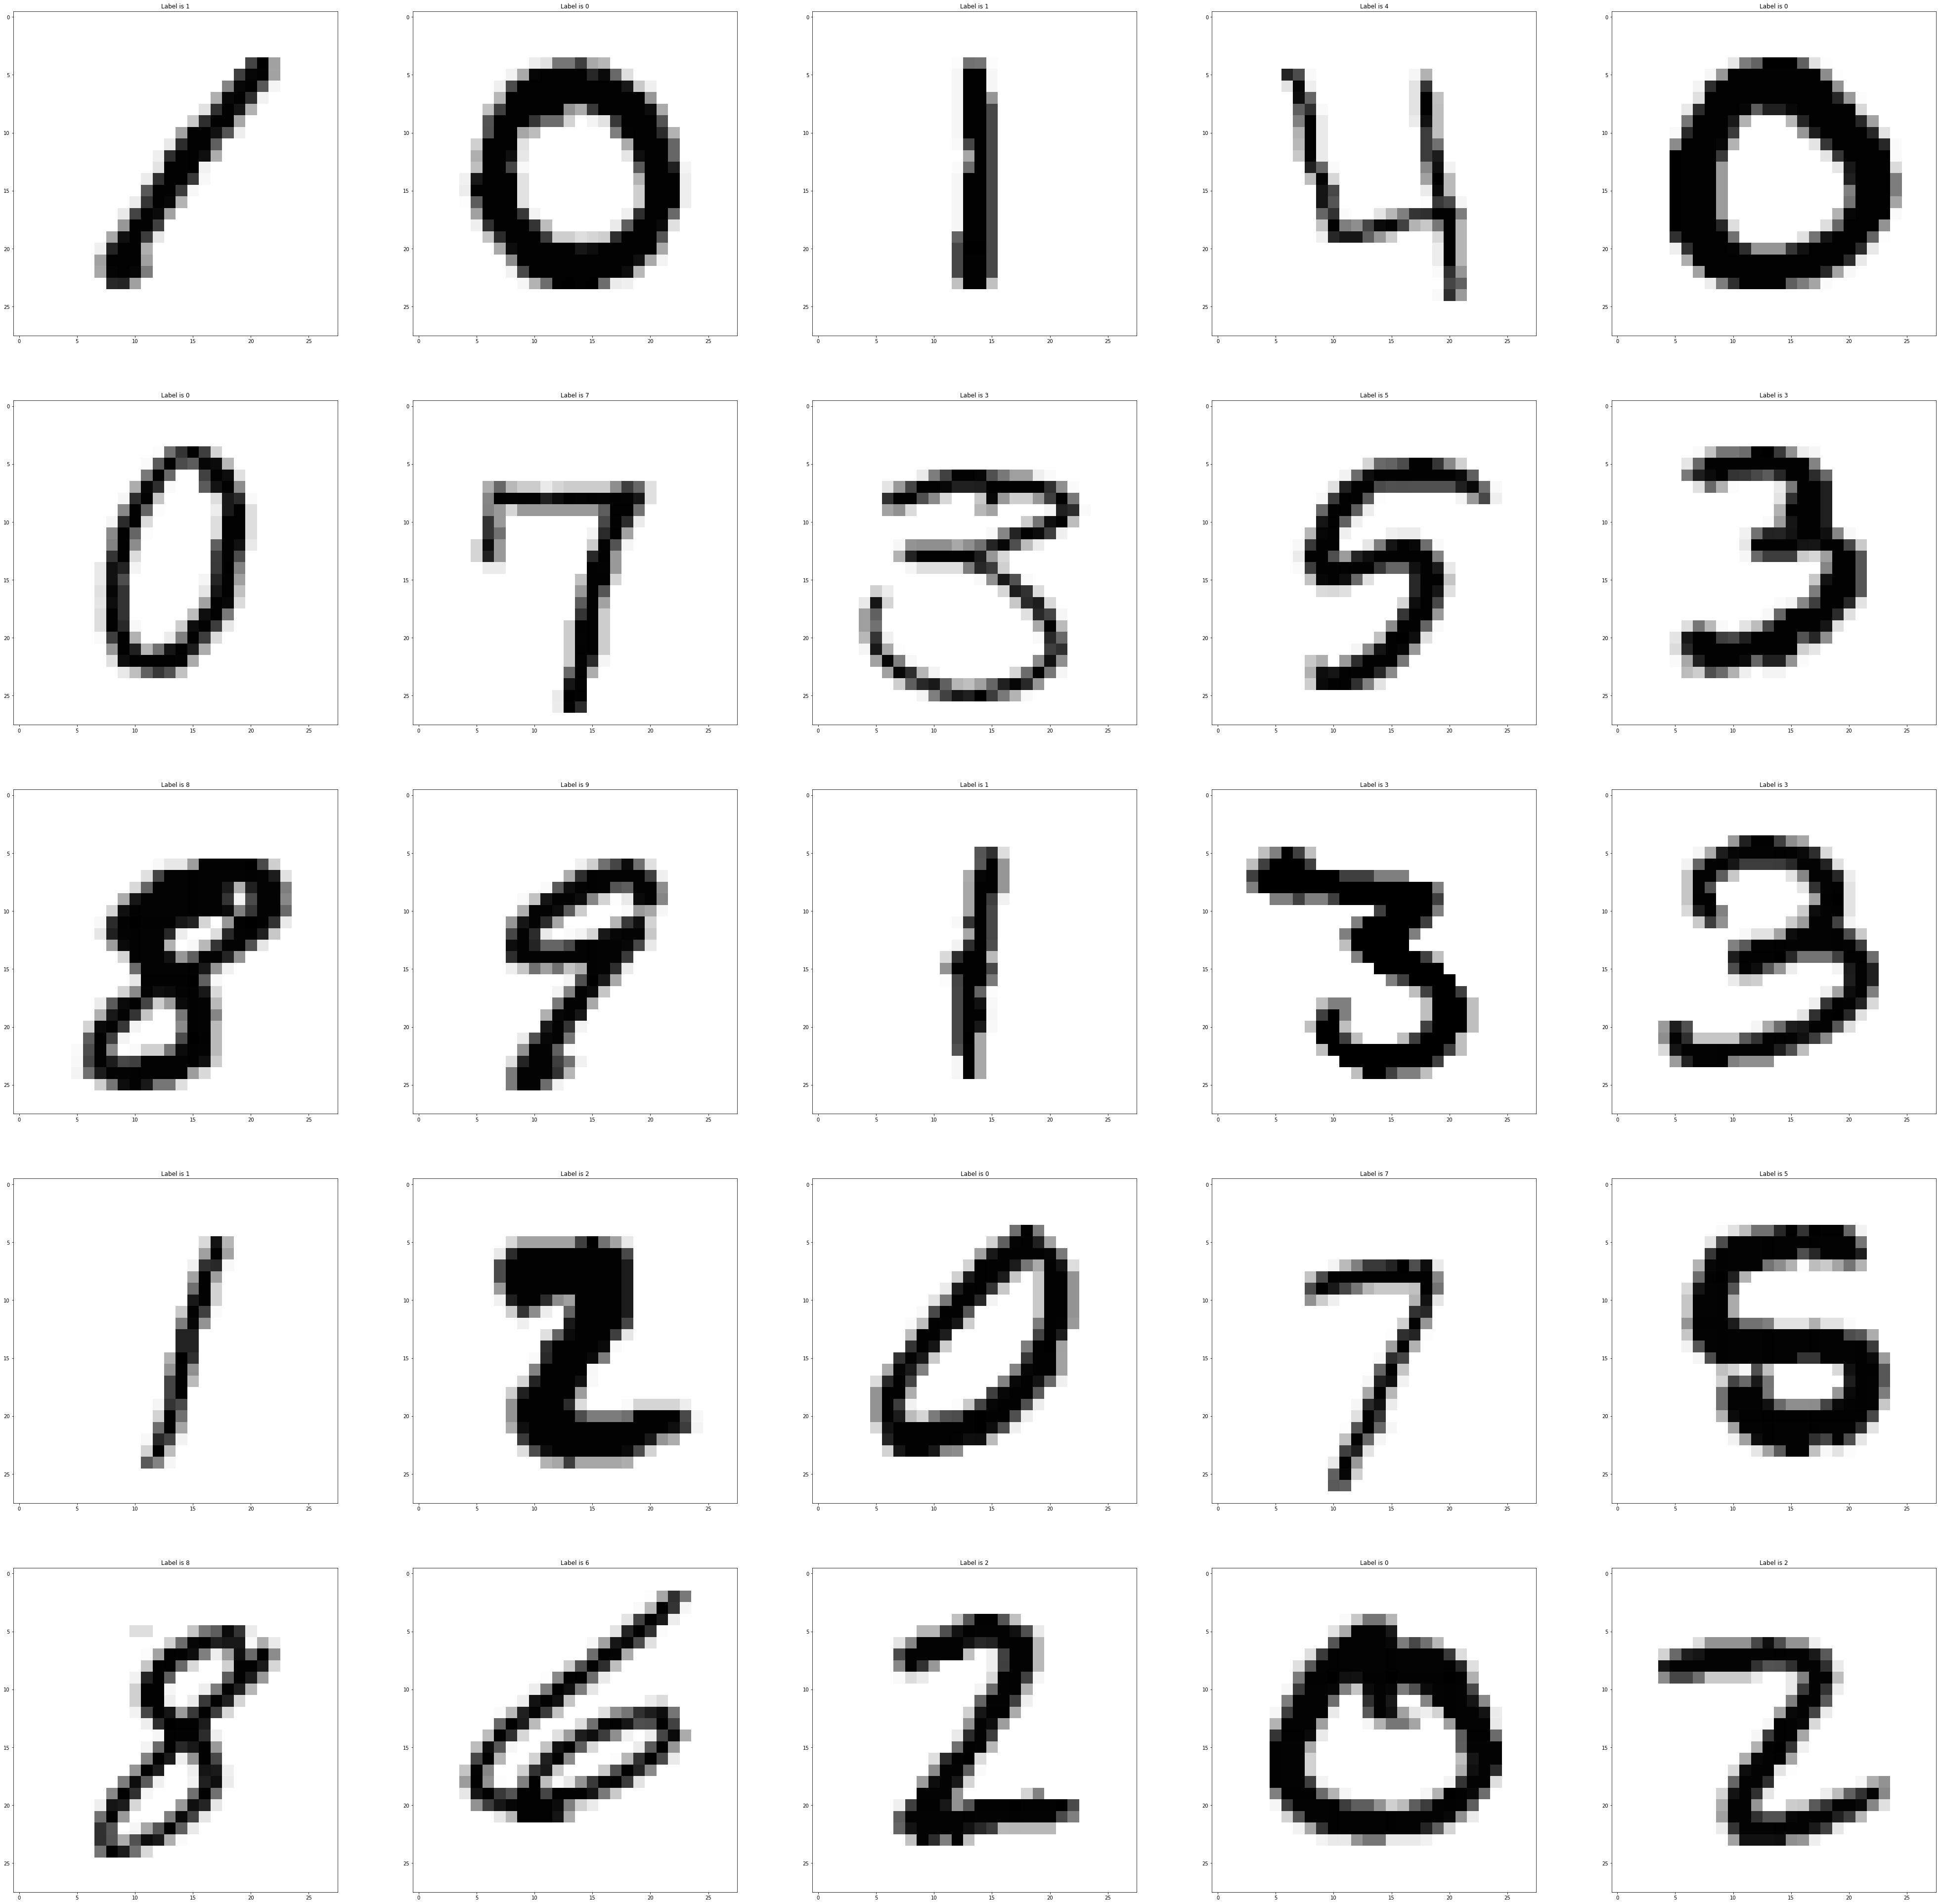

In [12]:
from pylab import *

figure(figsize=(70,70))

for f in range(0,5):
    for g in range(0,5):
        subplot(5,5,f*5+g+1).axes.set_title('Label is {label}'.format(label=y[f*5+g]));
        plotnumber(f*5+g)

# Data processing

We will add new columns to the data set that by combining products of the columns.  Included are the squares as well.

In [13]:
#for z in range(0,784):
 #   for w in range(z,784):
  #      XNew = X[:,[z]]*X[:,[w]]
   #     X = np.append(X,XNew, axis=1)

In [10]:
print(X)
X.shape

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


(42000, 784)

We will transform the data in two ways with both a z-transform and a min-max transform

In [11]:
from sklearn import preprocessing

#Z-Transformed Data
Xz=preprocessing.scale(X)

#Min-Max Transformed data
min_max_scaler = preprocessing.MinMaxScaler()
Xmax = min_max_scaler.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
print(X)
print(Xz)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [13]:
Xz[0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -5.28063530e-03,  -6.87837385e-03,  -4.87955846e-03,
        -4.87955846e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -4.87955846e-03,
        -5.62918092e-03,  -9.32058423e-03,  -1.17998060e-02,
        -1.63061719e-02,  -2.03752520e-02,  -2.59514740e-02,
        -2.99643170e-02,  -3.19107654e-02,  -3.22486821e-02,
        -3.25422311e-02,  -2.99246677e-02,  -2.98195932e-02,
        -2.79072967e-02,  -2.35148150e-02,  -1.75808468e-02,
        -1.53656634e-02,

##  Principle Component Analysis (PCA)

In [14]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Here will we take the PCA of the new larger data file X.  This reduces the dimensionality.

[ 0.09748496  0.07159942  0.06145625  0.05379059  0.0489404   0.04303019
  0.03276902  0.02891973  0.02766777  0.02348765  0.0209923   0.02058908
  0.01702477  0.01692711  0.01581055  0.01483173  0.01319628  0.0128267
  0.01187922  0.01152703  0.01072143  0.01015154  0.00964859  0.00912805
  0.00887601  0.00838728  0.00811819  0.00777369  0.007406    0.00686624
  0.00657949  0.00638758  0.00599327  0.00588879  0.0056423   0.00540877
  0.00508984  0.00487301  0.00474837  0.00466313]


0.78710233071737812

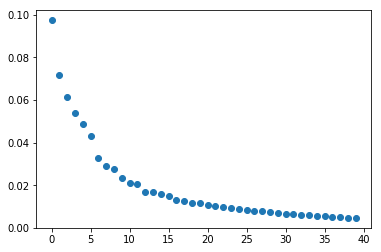

In [15]:
from sklearn.decomposition import PCA


pca = PCA(n_components=40)
XPCA = pca.fit_transform(Xmax)
py.plot(pca.explained_variance_ratio_,'o');


print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[ 0.05747953  0.04111691  0.03782867  0.02939862  0.02556439  0.02229844
  0.01952552  0.01771605  0.0156266   0.01424956  0.01361009  0.01222541
  0.01135736  0.0111309   0.0105031   0.01012325  0.009513    0.00934511
  0.00907253  0.00885318  0.00838894  0.00812007  0.00775133  0.00752287
  0.00727661  0.00698604  0.00690343  0.00664722  0.00630318  0.00615998
  0.00610521  0.00596525  0.0057709   0.00572804  0.00563634  0.00544504
  0.00533231  0.00522365  0.00497759  0.00483806]


0.51362027283669276

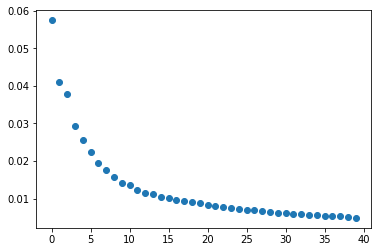

In [16]:
pca = PCA(n_components=40)
XPCAz = pca.fit_transform(Xz)
py.plot(pca.explained_variance_ratio_,'o');


print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

By observing the Skree plot we notice that the PCA has a knee somewhere near 2 and 4.  We look at the PCA plots for the first two and three variables.

In [21]:
def plots(XPCA):
    -

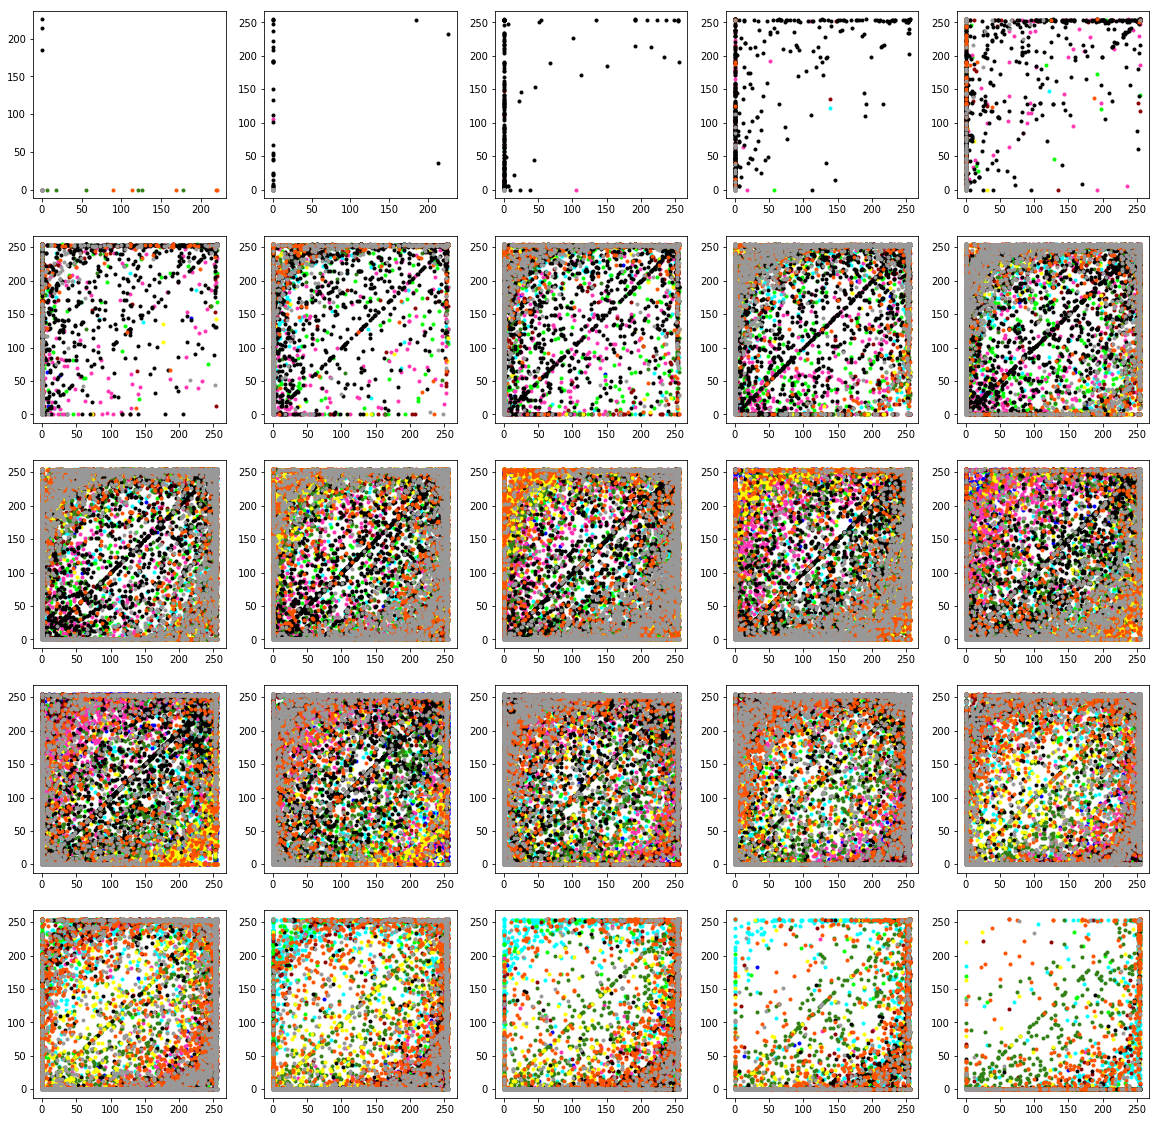

In [32]:
from pylab import *

figure(figsize=(20,20))

for f in range(0,5):
    for g in range(0,5):
        subplot(5,5,f*5+g+1)
        plots(X[:,f*5+g+279:f*5+g+281])

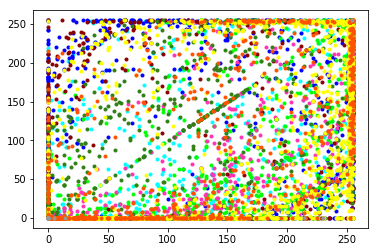

In [33]:
plots(X[:,130:132])

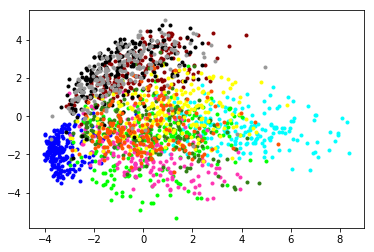

In [22]:
plots(XPCA[:2000])

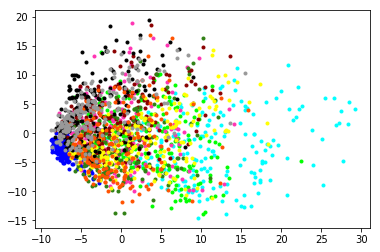

In [23]:
plots(XPCAz[:2000])

In [17]:
smallx = XPCA[0:4000,:]
print(smallx.shape)
y[:len(smallx)]

(4000, 40)


array([1, 0, 1, ..., 6, 6, 4], dtype=int64)

In [18]:
from sklearn.manifold import TSNE
np.random.seed(12)

X_embedded = TSNE(n_components=2).fit_transform(smallx)
X_embedded.shape

(4000, 2)

In [19]:
plots(X_embedded)

NameError: name 'plots' is not defined

## K-Nearest Neighbors.

Below we present the options for the KNeighbors function.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

n_neighbors : int, optional (default = 5)
Number of neighbors to use by default for k_neighbors queries.

weights : str or callable, optional (default = ‘uniform’)
weight function used in prediction. Possible values:
‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

metric : string or DistanceMetric object (default = ‘minkowski’)
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics. 

p : integer, optional (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric_params : dict, optional (default = None)
Additional keyword arguments for the metric function.

In [28]:
# Import the K-NN solver
from sklearn import neighbors

This first program will create will look at two of the values and interpret the test.

In [29]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest(clf,X,y,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    #np.random.seed(123)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:2]
    Xtest = X[perm[trainSize:],0:2]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    py.figure(1, figsize=(8, 6))
    cmap_light = ListedColormap(['#AAFFFF', '#AAAAFF', '#AAFFAA','#FF34B3','#8B0000','#308014','#FFFFAA', '#000000',(1,0.321,0),'#999999'])
    cmap_bold = ListedColormap(['#00FFFF', '#0000FF', '#00FF00','#FF34B3','#8B0000','#308014','#FFFF00', '#000000',(1,0.321,0),'#999999'])
    py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    py.xlim(xx.min(), xx.max())
    py.ylim(yy.min(), yy.max())
    py.show()

    # Print out some metrics
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

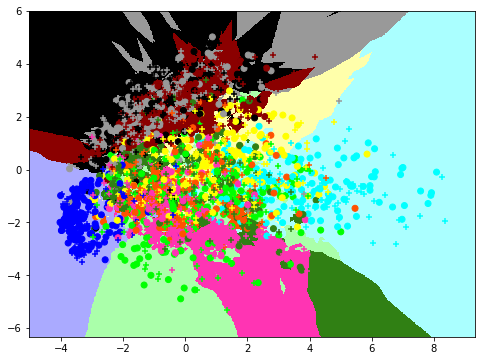

training score 0.57803030303
testing score 0.435294117647


In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,XPCA[:2000,0:2],y[:2000])

In [ ]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,X_embedded,y[:2000])

# Tensor Flow

In [28]:
import tensorflow as tf

perm = np.random.permutation(len(y))
n = Xz.shape[0]
trainSize = int(.66*n)
Xtrain = Xz[perm[:trainSize],:]
Xtest = Xz[perm[trainSize:],:]

yHat = y
yHattrain = yHat[perm[:trainSize]]
yHattest = yHat[perm[trainSize:]]

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(Xtrain)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[500,500,500,500], n_classes=10, feature_columns=feature_columns)
dnn_clf.fit(x=Xtrain,y=yHattrain,batch_size=50, steps=4000)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F95B398C50>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\njacob\\AppData\\Local\\Temp\\tmpj2g5v64m'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\njacob\AppData\Lo

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x000001F95F333668>, 'hidden_units': [500, 500, 500, 500], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x000001F97E594378>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [29]:
from sklearn.metrics import accuracy_score

y_pred = list(dnn_clf.predict(Xtest))
accuracy_score(yHattest,y_pred)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\njacob\AppData\Local\Temp\tmpj2g5v64m\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.96911764705882353

In [ ]:
runTest1(Xz,y)

# Tensor Flow From Scratch

In [30]:
import tensorflow as tf

perm = np.random.permutation(len(y))
n = Xz.shape[0]
trainSize = int(.66*n)
Xtrain = Xz[perm[:trainSize],:]
Xtest = Xz[perm[trainSize:],:]

yHat = y
yHattrain = yHat[perm[:trainSize]]
yHattest = yHat[perm[trainSize:]]

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(Xtrain, yHattrain, epochs=5)
model.evaluate(Xtest, yHattest)


Epoch 1/5
27720/27720 [==============================] - 5s 185us/step - loss: 0.3343 - acc: 0.9084
Epoch 2/5
27720/27720 [==============================] - 5s 172us/step - loss: 0.1857 - acc: 0.9496
Epoch 3/5
27720/27720 [==============================] - 5s 180us/step - loss: 0.1359 - acc: 0.9622
Epoch 4/5
27720/27720 [==============================] - 5s 175us/step - loss: 0.1222 - acc: 0.9675
Epoch 5/5
14280/14280 [==============================] - 0s 33us/step


[0.23245794116134602, 0.95553221288515411]